In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from matplotlib import style
import re
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
import nltk
import string
nltk.download('stopwords')
from collections import Counter
sns.set(font='DejaVu Sans')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MahmoudNasser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [356]:
style.use('ggplot')

# Egy-Rap Scene

### In this project we are going to answer some questions about the Egyptian rap artists Marawan Moussa, Marawn Pablo, abyo, Wegz and Afroto
### We are going to start with some questions like :


- What are the most common words or phrases across all of the songs of an artist?
- Are there any words or phrases that appear more frequently in the lyrics of certain artists?
- Do certain artists tend to write longer or shorter songs than others?
- Are there any trends or patterns in the sentiment of the lyrics over time or across different artists?
- Are there any topics or themes that are particularly prevalent in the lyrics of certain artists or genres?
- Are the songs of the artist similar and are the songs of different artists similart ?




### Start With Text preprocessing

In [454]:
stop_words_ =['من','في','على','و','فى','يا','عن','مع','ان','هو','علي','ما','اللي','كل','بعد','ده','اليوم','أن','يوم','انا',
              'إلى','كان','ايه','اللى','الى','دي','بين','انت','أنا','حتى','لما','فيه',
 'هذا','واحد','احنا','اي','كده','إن','او','أو','عليه','ف','دى','مين','الي','كانت',
 'أمام','زي','يكون','خلال','ع','كنت','هي','فيها','عند','التي','الذي','قال','هذه','قد',
 'انه','ريتويت','بعض','أول','ايه','الان','أي','منذ','عليها','له','ال','تم','ب','دة','عليك','اى','كلها','اللتى','هى','دا',
 'انك','وهو','ومن','منك','نحن','زى','أنت','انهم','معانا','حتي','وانا','عنه','إلي','ونحن','وانت','منكم','وان',
 'معاهم','معايا','وأنا','عنها','إنه','اني','معك','اننا','فيهم','د','انتا','عنك','وهى','معا','آن','انتي','وأنت',
 'وإن','ومع','وعن','معاكم','معاكو','معاها','وعليه','وانتم','وانتي','¿','|','فين','كله','عنده','علشان','للي',
 "كدا",'لكل','فيك','بييني وبينك','فكك',"بيننا",'جوا','الاخر','دول','انتو','خالص',"طب","بجد","بتاع","عشان"]

list_of_stop_Words=open('arabic_stop_words.txt','r',encoding='utf-8').read()

def normalize(text):
    filtered_text = [] 
    for sentence in text:
        sentence = re.sub("[إأآا]", "ا", sentence)
        sentence = re.sub("ى", "ي", sentence)
        sentence = re.sub("ؤ", "ء", sentence)
        sentence = re.sub("ئ", "ء", sentence)
        sentence = re.sub("ة", "ه", sentence)
        sentence = re.sub("گ", "ك", sentence)
        sentence = re.sub('\[المقدمة\]',' ',sentence)
        sentence = re.sub('\[المقطع\]',' ',sentence)
        sentence = re.sub('\[الخاتمة\]',' ',sentence) 
        sentence = re.sub('\[المقدمه\]',' ',sentence)
        sentence = re.sub('\[الخاتمه\]',' ',sentence)
        sentence = re.sub('\[المقطع الثاني\]',' ',sentence)
        sentence = re.sub('\[المقطع الاول\]',' ',sentence)
        sentence = re.sub('المقطع الاول',' ',sentence)
        sentence = re.sub('\[اللازمه\]',' ',sentence)
        sentence = re.sub('\[اللازمه\]',' ',sentence)
        sentence = re.sub('\[اللازمة\]',' ',sentence)
        sentence = re.sub(r"[\\n]", " ", sentence)
        sentence = re.sub(r'\[','',sentence)
        sentence = re.sub(r'\]','',sentence)
        sentence = re.sub('ال',' ',sentence)
 
        sentence= re.sub('u202b','Beat',sentence)
        filtered_text.append(sentence)
    return pd.DataFrame(data = filtered_text, columns = ['Lyrics'])

def remove_stopwords(text):
    stop_words = set(nltk.corpus.stopwords.words('English'))
    remove_stop_word = lambda x: ' '.join([word for word in x.split() if word not in stop_words and word not in stop_words_ and word not in list_of_stop_Words])
    return text.apply(remove_stop_word)

def remove_puncs(text):
    punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation
    filtered_text = [] 
    for sentence in text: 
        translator = str.maketrans('', '', punctuations)
        filtered_text.append(sentence.translate(translator))
    return filtered_text

def remove_emojis(text):
    remove_Emoji = lambda x : re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags = re.UNICODE).sub(r'',x)
    return text.apply(remove_Emoji)

# # def stemming(text):
#     ArListem = ArabicLightStemmer()
#     each_lemma_word = []
#     each_lemma_sentence = []
#     for sentence in text:
#         for word in sentence.split():
#             stem = ArListem.light_stem(word)
#             each_lemma_word.append(stem)
#         each_lemma_sentence.append(" ".join(each_lemma_word))
#         each_lemma_word.clear()
#     return each_lemma_sentence
def clean_text(text,lyrics_col):
    s1 = normalize(text)
    print('normalized!')
    
    s2 = remove_stopwords(s1[lyrics_col])
    print('stop words removed!')
    
    s3 = remove_emojis(s2)
    print('emojis removed! ')
    
    s4 =  remove_puncs(s3)
    print('punctuations removed!')
        
    return s4


In [455]:
marawn_pablo=pd.read_csv('Marwan pablo-songs.csv',encoding='utf-8')
marawn_pablo.head()
marawn_pablo.dropna(inplace=True)

In [456]:
Wegz=pd.read_csv('Wegz-songs.csv')
Wegz.head()
Wegz.dropna(inplace=True)

In [457]:
marawn_moussa=pd.read_csv('Marwan moussa-songs.csv')
marawn_moussa.dropna(inplace=True)
marawn_moussa.head()

,Title,Artist,Song_url,Lyrics,Date_published,image_url
0,12 De2i2a | ١٢ دقيقة by Marwan Moussa - مروان ...,Marwan moussa,https://genius.com/Marwan-moussa-12-de2i2a-lyrics,['[اللازمة]\nعزيزي الإنسان\nنفسي أموّت الناموس...,"May 17, 2018",https://images.genius.com/d575036dabb413e5aa5e...
1,1/4 Qarn | ١/٤ قرن by Marwan Moussa - مروان مو...,Marwan moussa,https://genius.com/Marwan-moussa-1-4-qarn-lyrics,['[المقدمة: مروان موسى]\nإسماعيلية الدولة، أنا...,"January 1, 2021",https://images.genius.com/84eb8a7c4b5b49272653...
2,2001 by Marwan Moussa - مروان موسى,Marwan moussa,https://genius.com/Marwan-moussa-2001-lyrics,['[المقطع الاول]\nالتاريخ في عربيتي ٢٠٠١\nعايش...,"May 24, 2017",https://images.genius.com/d62ae463f82c6a2adb03...
3,2el Meny Shokran | قل مني شكرا by Hesham Rapto...,Marwan moussa,https://genius.com/Hesham-raptor-2el-meny-shok...,['[المقطع الأول]\nعايز تكلم رابتور أبعت قل مني...,"March 3, 2018",https://images.genius.com/41b3e06905427880dbb0...
4,300 Marra | ٣٠٠ مرة by Abyusif - أبيوسف,Marwan moussa,https://genius.com/Abyusif-300-marra-lyrics,['[المقطع الأول]\nما جيتيش في بالي النهاردة\nغ...,"January 22, 2019",https://images.genius.com/23df951fefaf9135a5c3...


In [458]:
Afroto=pd.read_csv('Afroto-songs.csv')
Afroto.head()

,Title,Artist,Song_url,Lyrics,Date_published,image_url
0,16 Bar | ١٦ بار by Afroto - عفروتو,Afroto,https://genius.com/Afroto-16-bar-lyrics,['[المقدمة]\n١٦ بار بالإسكندراني\nInto My Mind...,"December 12, 2019",https://images.genius.com/59b394fab179902f6bb8...
1,3Akaret | عكاريت by Afroto - عفروتو,Afroto,https://genius.com/Afroto-3akaret-lyrics,['[اللازمة]\nكل الشباب دي عكاريت بيخافوا مني م...,"April 8, 2021",https://images.genius.com/146ae7366064dc7652d0...
2,3al Sa5an | عالسخان by Batistuta - باتيستوتا (...,Afroto,https://genius.com/Batistuta-3al-sa5an-lyrics,['[المقدمة]\nراشد\nPop pop\nإسمع أبن والدي\nعف...,"February 22, 2020",https://images.genius.com/faf25b55a5abfe38073a...
3,3la 3eny | على عيني by Afroto - عفروتو,Afroto,https://genius.com/Afroto-3la-3eny-lyrics,['[المقطع الأول]\nمفيش بالحب مفيش قريب\nفا إضط...,"April 19, 2020",https://images.genius.com/47df05099ca976e54a17...
4,5ams 5ams | خمس خمس by Afroto - عفروتو (Ft. Ha...,Afroto,https://genius.com/Afroto-5ams-5ams-lyrics,['[اللازمة: حازم إسكالي]\nعلى كل مسامع الناس\n...,"January 11, 2020",https://images.genius.com/589d060119c21b920447...


In [459]:
abyo=pd.read_csv('Abyusif-songs.csv')
abyo.dropna(inplace=True)
abyo.head()

,Title,Artist,Song_url,Lyrics,Date_published,image_url
0,200K | ٢٠٠ ألف by Abyusif - أبيوسف,Abyusif,https://genius.com/Abyusif-200k-lyrics,['[المقدمة]\nمية تسعة وتسعين ألف\nمية تسعة وتس...,"August 9, 2018",https://images.genius.com/e1e45627a2874e9f98bb...
3,2otta | قطة by Abyusif - أبيوسف,Abyusif,https://genius.com/Abyusif-2otta-lyrics,['[المقدمة]\n\u202bليل بابا ع الـ Beat\nهيثم\n...,"February 14, 2021",https://images.genius.com/974abb8d1a908222bb8d...
4,300 Marra | ٣٠٠ مرة by Abyusif - أبيوسف,Abyusif,https://genius.com/Abyusif-300-marra-lyrics,['[المقطع الأول]\nما جيتيش في بالي النهاردة\nغ...,"January 22, 2019",https://images.genius.com/23df951fefaf9135a5c3...
5,3AKSY | عكسي by Abyusif - أبيوسف,Abyusif,https://genius.com/Abyusif-3aksy-lyrics,['[اللازمة]\nوأنا أدرى باللي أنا فيه\nأنا فين،...,"January 1, 2012",https://images.genius.com/982463a63dbb3fb05d25...
6,3amaltaha Agmad | عملتها أجمد by Abyusif - أبيوسف,Abyusif,https://genius.com/Abyusif-3amaltaha-agmad-lyrics,['[المقطع الأول]\nحديث مع الأنا، أجمد أغنية إن...,"September 10, 2019",https://images.genius.com/a2b2ee4b4b2f14fb8dc5...


In [460]:
def exctract_title_ar_and_year(df,title):
    df=df.copy()
    df['Title_english'] = df['Title'].apply(lambda x:x.split('|')[0])
    df['Title_ar'] = df['Title'].apply(lambda x:x.split('|')[-1])
    df['Title_ar']=df['Title_ar'].apply(lambda x:x.split('by')[0])
    df['year']=df['Date_published'].apply(lambda x:x.split(',')[-1])
    df=df[['Title_english', 'Title_ar','Title','Artist', 'year', 'Lyrics','Song_url','image_url']]
    df.drop(['Title'],axis=1,inplace=True)
    df.index=df['Title_ar']
    return df
def get_cleaned_lyrics(df):
    df=df.copy()
    lyrics_col='Lyrics'
    df['cleaned_lyrics']=clean_text(df[lyrics_col],lyrics_col)
    df.drop(['Lyrics'],axis=1,inplace=True)
    return df


In [461]:
df1=exctract_title_ar_and_year(marawn_pablo,'Title')
marawn_pablo_cleaned=get_cleaned_lyrics(df1)
marawn_pablo_cleaned.head()

normalized!
stop words removed!
emojis removed! 
punctuations removed!


,Title_english,Title_ar,Artist,year,Song_url,image_url,cleaned_lyrics
Title_ar,,,,,,,
عادي فشخ,3adi Fash5,عادي فشخ,Marwan pablo,2016,https://genius.com/Marwan-pablo-3adi-fash5-lyrics,https://images.genius.com/851c4fd260fad7b7e457...,عادي فشخ فشخ تدي ايحاء روش فشخ حياتي ممله مسخ...
عالم إفتراضي,3alam Eftradi,عالم إفتراضي,Marwan pablo,2016,https://genius.com/Marwan-pablo-3alam-eftradi-...,https://images.genius.com/851c4fd260fad7b7e457...,بنام وبصحي اوضه اصغر دماغي عايش مكتءب افتراضي...
عايز فين,3ayz Fin,عايز فين,Marwan pablo,2018,https://genius.com/Marwan-pablo-3ayz-fin-lyrics,https://images.genius.com/a23f757b37fb5fe02440...,Ok WoohWoWo فاكر وريهم بقي عايز فين بقت بتدوس...
عزبة الجامع,3Ezbt El Game3,عزبة الجامع,Marwan pablo,2018,https://genius.com/Marwan-pablo-3ezbt-el-game3...,https://images.genius.com/cfd65e509e58dff1e6ba...,خلاص بطلت صحبه بتجمع حشيش خلاص بطلت صحبه بتجم...
خفافيش,5afafish,خفافيش,Marwan pablo,2016,https://genius.com/Marwan-pablo-5afafish-lyrics,https://images.genius.com/851c4fd260fad7b7e457...,احتكار بجري تتار كلامي ناسبك هيلففك بحار مزيك...


In [462]:
marawn_pablo_cleaned.columns

Index(['Title_english', 'Title_ar', 'Artist', 'year', 'Song_url', 'image_url',
       'cleaned_lyrics'],
      dtype='object')

In [463]:
dfw=exctract_title_ar_and_year(Wegz,'Title')
Wegz_cleaned=get_cleaned_lyrics(dfw)
Wegz_cleaned.head()

normalized!
stop words removed!
emojis removed! 
punctuations removed!


,Title_english,Title_ar,Artist,year,Song_url,image_url,cleaned_lyrics
Title_ar,,,,,,,
16 بار بالعربي,16 بار بالعربي by Wegz - ويجز,16 بار بالعربي,Wegz,2018,https://genius.com/Wegz-16-lyrics,https://images.genius.com/d105b154dee6e16d9771...,زميلي زمايلي كتير ومعروفين جنبي بابا روفيل وش...
واحد وعشرين,21,واحد وعشرين,Wegz,2020,https://genius.com/Wegz-21-lyrics,https://images.genius.com/466c62649ebd062d85a9...,اوووه اووووه اووه اوه اوه اوه اوه اوووه اوووو...
على راحتي,3la Ra7ty,على راحتي,Wegz,2019,https://genius.com/Wegz-3la-ra7ty-lyrics,https://images.genius.com/65c387f140b9cd081901...,هلا عوده قلوبكم سوده بادء فوره جايبك شوقك كلف...
حرامية,7ramia,حرامية,Wegz,2018,https://genius.com/Vortex-7ramia-lyrics,https://images.genius.com/755623664c9af16a8866...,نمشي نيه جرايمنا علنيه مادشوا خانه فسمونا حرا...
عفاريت الأسفلت,Afareet El Asphalt,عفاريت الأسفلت,Wegz,2021,https://genius.com/Wegz-afareet-el-asphalt-lyrics,https://images.genius.com/ff638d281b6c7a448fd0...,ادليب بابا جيهه جيهه يجيها بابا جيهه جيهه يجيه...


In [464]:
dfA=exctract_title_ar_and_year(Afroto,'Title')
Afroto_cleaned=get_cleaned_lyrics(dfA)
Afroto_cleaned.head()

normalized!
stop words removed!
emojis removed! 
punctuations removed!


,Title_english,Title_ar,Artist,year,Song_url,image_url,cleaned_lyrics
Title_ar,,,,,,,
١٦ بار,16 Bar,١٦ بار,Afroto,2019,https://genius.com/Afroto-16-bar-lyrics,https://images.genius.com/59b394fab179902f6bb8...,١٦ بار اسكندراني I My Mi عفروت راشد Yeah Ahme...
عكاريت,3Akaret,عكاريت,Afroto,2021,https://genius.com/Afroto-3akaret-lyrics,https://images.genius.com/146ae7366064dc7652d0...,شباب عكاريت بيخافوا مني مطاريد بعلم تلاميذ ود...
عالسخان,3al Sa5an,عالسخان,Afroto,2020,https://genius.com/Batistuta-3al-sa5an-lyrics,https://images.genius.com/faf25b55a5abfe38073a...,راشد Pop pop اسمع ابن عفرو وباتيستوتا عفرو Ye...
على عيني,3la 3eny,على عيني,Afroto,2020,https://genius.com/Afroto-3la-3eny-lyrics,https://images.genius.com/47df05099ca976e54a17...,مفيش حب مفيش قريب اضطريت اغيب عيني عيني يحاسب...
خمس خمس,5ams 5ams,خمس خمس,Afroto,2020,https://genius.com/Afroto-5ams-5ams-lyrics,https://images.genius.com/589d060119c21b920447...,لازمه حازم اسك مسامع ناس بعدي مافيش منافسين ت...


In [465]:
dfAb=exctract_title_ar_and_year(abyo,'Title')
abyo_cleaned=get_cleaned_lyrics(dfAb)
abyo_cleaned.head()

normalized!
stop words removed!
emojis removed! 
punctuations removed!


,Title_english,Title_ar,Artist,year,Song_url,image_url,cleaned_lyrics
Title_ar,,,,,,,
٢٠٠ ألف,200K,٢٠٠ ألف,Abyusif,2018,https://genius.com/Abyusif-200k-lyrics,https://images.genius.com/e1e45627a2874e9f98bb...,ميه تسعه وتسعين ميه تسعه وتسعين ونص ميه تسعه ...
قطة,2otta,قطة,Abyusif,2021,https://genius.com/Abyusif-2otta-lyrics,https://images.genius.com/974abb8d1a908222bb8d...,Beatليل بابا Beat هيثم وعشرين ولاد هع رايحه...
٣٠٠ مرة,300 Marra,٣٠٠ مرة,Abyusif,2019,https://genius.com/Abyusif-300-marra-lyrics,https://images.genius.com/23df951fefaf9135a5c3...,جيتيش نهارده ٣٠٠ مره باينلك دماغي محبوسه بتطل...
عكسي,3AKSY,عكسي,Abyusif,2012,https://genius.com/Abyusif-3aksy-lyrics,https://images.genius.com/982463a63dbb3fb05d25...,ادري فين قلمين افوق فين قلمين نوم بيخلص بدري ...
عملتها أجمد,3amaltaha Agmad,عملتها أجمد,Abyusif,2019,https://genius.com/Abyusif-3amaltaha-agmad-lyrics,https://images.genius.com/a2b2ee4b4b2f14fb8dc5...,حديث انا اجمد اغنيه نزلتها عبقري مش كتبتها u2...


In [466]:
dfM=exctract_title_ar_and_year(marawn_moussa,'Title')
marawn_moussa_cleaned=get_cleaned_lyrics(dfM)
marawn_moussa_cleaned.head()

normalized!
stop words removed!
emojis removed! 
punctuations removed!


,Title_english,Title_ar,Artist,year,Song_url,image_url,cleaned_lyrics
Title_ar,,,,,,,
١٢ دقيقة,12 De2i2a,١٢ دقيقة,Marwan moussa,2018,https://genius.com/Marwan-moussa-12-de2i2a-lyrics,https://images.genius.com/d575036dabb413e5aa5e...,عزيزي انسان نفسي اموّت ناموسه مش بتخليك تنام ...
١/٤ قرن,1/4 Qarn,١/٤ قرن,Marwan moussa,2021,https://genius.com/Marwan-moussa-1-4-qarn-lyrics,https://images.genius.com/84eb8a7c4b5b49272653...,مقدمه مروان موسي اسماعيليه دوله ورع هنقلبها ف...
2001,2001 by Marwan Moussa - مروان موسى,2001,Marwan moussa,2017,https://genius.com/Marwan-moussa-2001-lyrics,https://images.genius.com/d62ae463f82c6a2adb03...,تاريخ عربيتي ٢٠٠١ عايش حياتي كاني ٢٠٠٠ لعّيب ...
قل مني شكرا,2el Meny Shokran,قل مني شكرا,Marwan moussa,2018,https://genius.com/Hesham-raptor-2el-meny-shok...,https://images.genius.com/41b3e06905427880dbb0...,عايز تكلم رابتور ابعت مني شكرا مني يكرم بينا ...
٣٠٠ مرة,300 Marra,٣٠٠ مرة,Marwan moussa,2019,https://genius.com/Abyusif-300-marra-lyrics,https://images.genius.com/23df951fefaf9135a5c3...,جيتيش نهارده ٣٠٠ مره باينلك دماغي محبوسه بتطل...


In [467]:
def get_num_words(df,clean_lyrics):
    df=df.copy()
    df['Num_words'] = df[clean_lyrics].str.split().apply(len)
    return df
def get_artisit_word_freq(df):
    df=df.copy()
    joined_text_Mp=' '.join(df['cleaned_lyrics'])
    df_words=Counter(joined_text_Mp.split())


    df=pd.DataFrame.from_dict(df_words,orient='index',columns=['Frequency'])
    df=df.sort_values(by='Frequency',ascending=False)
    return df

In [468]:
marawn_pablo_cleaned=get_num_words(marawn_pablo_cleaned,'cleaned_lyrics')
marawn_moussa_cleaned=get_num_words(marawn_moussa_cleaned,'cleaned_lyrics')
Wegz_cleaned=get_num_words(Wegz_cleaned,'cleaned_lyrics')
Afroto_cleaned=get_num_words(Afroto_cleaned,'cleaned_lyrics')
abyo_cleaned=get_num_words(abyo_cleaned,'cleaned_lyrics')

# Eda for Artists

In [469]:
#Average Numb of words for each artist
list_of_artisits_df=[marawn_pablo_cleaned,marawn_moussa_cleaned,Wegz_cleaned,Afroto_cleaned,abyo_cleaned]
artist_names=['Marawan Pablo','Marwan moussa','Wegz','Afroto','Abyusif']
artist_avg_num_words=[]
for artist in list_of_artisits_df:
    artist_avg_num_words.append(artist['Num_words'].mean())

In [470]:
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import random
from colour import Color

In [471]:
# Create a bar graph

layout = go.Layout(title='<b>Average Number of words by each artist</b>')
fig = go.Figure(data=[go.Bar(x=artist_names, y=artist_avg_num_words)],layout=layout)
# Customize the layout
fig.update_layout(xaxis_title='Artist Name', yaxis_title='Average Number of words', 
                   height=500, width=500)
plotly.offline.iplot(fig)

- What are the most common words or phrases across all of the songs of an artist?
- Are there any words or phrases that appear more frequently in the lyrics of certain artists?
- Do certain artists tend to write longer or shorter songs than others?
- Are there any trends or patterns in the sentiment of the lyrics over time or across different artists?
- Are there any topics or themes that are particularly prevalent in the lyrics of certain artists or genres?
- Are the songs of the artist similar and are the songs of different artists similart ?

In [472]:
marawn_moussa_wf=get_artisit_word_freq(marawn_moussa_cleaned)
marawn_moussa_wf

,Frequency
مش,161
عايز,23
ناس,23
كلام,22
لسه,20
...,...
نيجيلها,1
انجاز,1
كدا,1
نقيس,1


In [473]:
def display_wordcloud(artist_df,cmap='Reds'):
    mp_text=' '.join(artist_df['cleaned_lyrics'])
    reshaped_text = arabic_reshaper.reshape(mp_text)
    display_text = get_display(reshaped_text)
    word_counts=Counter(mp_text.split())
    font_path='NotoNaskhArabic-VariableFont_wght.ttf'
    wordcloud = WordCloud (
                        background_color = 'white',
                        width = 500,
                        height = 300,
                        font_path=font_path,colormap = cmap).generate(display_text)

    plt.imshow(wordcloud) # image show
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

# Vectorizing Text For topic modeling and Similarity measures

In [487]:
def vectorize_artist_text(artist_df,lyrics_col):
    vectorizer=TfidfVectorizer()
    vec=vectorizer.fit_transform(artist_df[lyrics_col])
    print(vectorizer.get_feature_names_out())
    df =pd.DataFrame(vec.toarray(), index=artist_df.index,columns=vectorizer.get_feature_names_out())
    return df

def get_similarity_matrix_of_artist(features_df):
    sim_matrix=cosine_similarity(features_df)
    print(sim_matrix.shape)
    sim_df=pd.DataFrame(sim_matrix,index=features_df.index,columns=features_df.index)
    return sim_df
def draw_sim_matrix(sim_df):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('None')
    mask = np.triu(np.ones_like(sim_df, dtype=bool))
    ax.set_xticks(np.arange(len(sim_df)))
    ax.set_yticks(np.arange(len(sim_df)))
    display_text=[]
    for text in sim_df.index.values:
        reshaped_text=arabic_reshaper.reshape(text)
        display_text.append(get_display(reshaped_text))

    sns.heatmap(sim_df, annot=False, cmap='Blues', 
                xticklabels=display_text, yticklabels=display_text,mask=mask)

    
    plt.show()
    

['3aks' '3ela' '3la' ... 'چيب' 'چيم' 'ڤيو']
(47, 47)


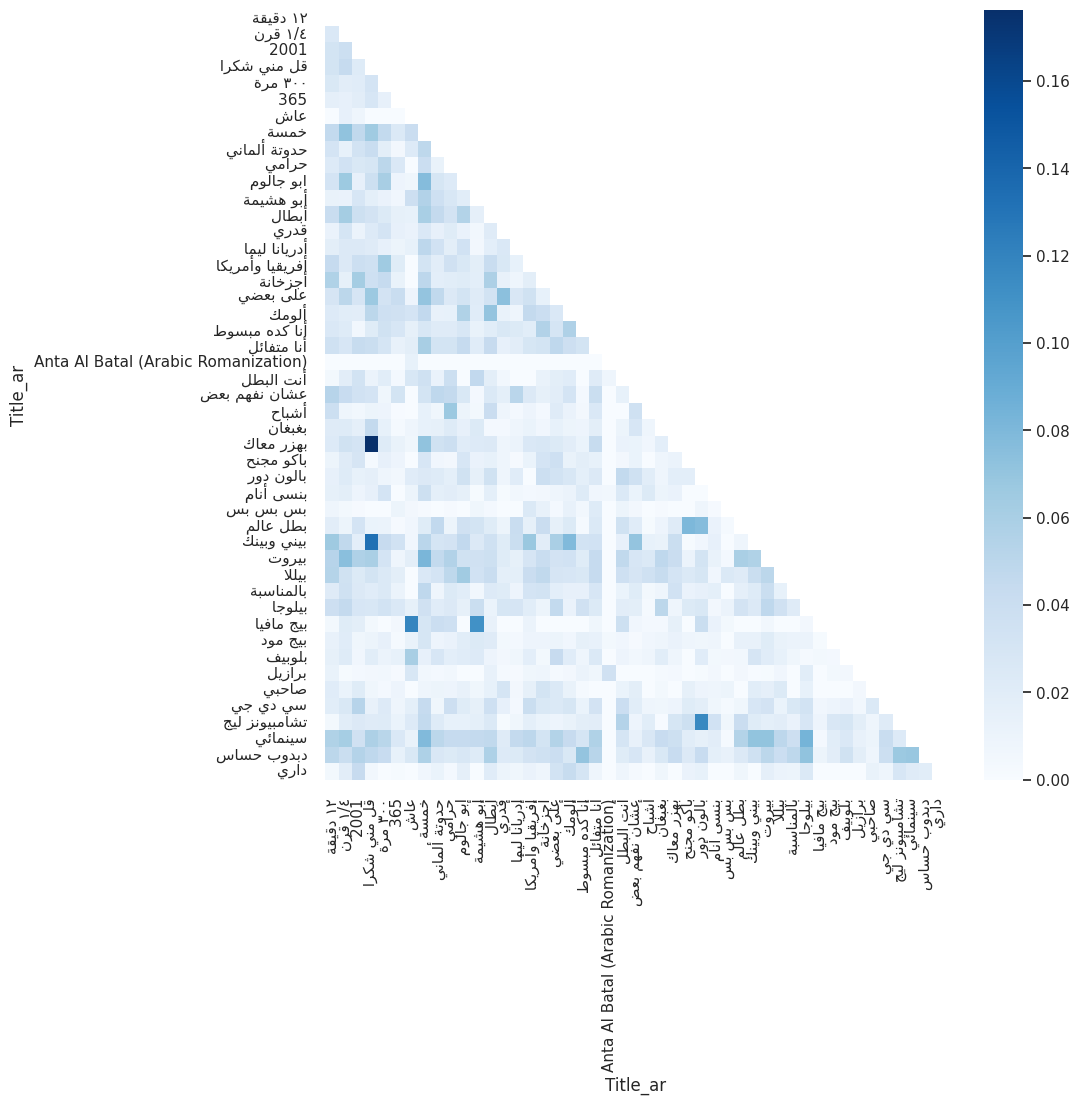

In [488]:
features_df=vectorize_artist_text(marawn_moussa_cleaned,lyrics_col='cleaned_lyrics')

sim_df=get_similarity_matrix_of_artist(features_df)
draw_sim_matrix(sim_df)

In [500]:
def get_similarity_of_songs(artist_df1,artist_df2,song_1=None,song_2=None,lyrics_col='cleaned_lyrics'):
    vectorizer=TfidfVectorizer()
    text_of_a1=''.join(artist_df1[lyrics_col])
    text_of_a2=''.join(artist_df2[lyrics_col])
    tfidf_matrix=vectorizer.fit_transform([text_of_a1,text_of_a2])
    similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    return similarity

similarity=get_similarity_of_songs(marawn_moussa_cleaned,Wegz_cleaned)
print(similarity)

[[0.54431493]]


In [507]:
data_words = ' '.join(marawn_pablo_cleaned['cleaned_lyrics'])
gensim=data_words.split()

['عادي',
 'فشخ',
 'فشخ',
 'تدي',
 'ايحاء',
 'روش',
 'فشخ',
 'حياتي',
 'ممله',
 'مسخ',
 'مفيش',
 'ابتكار',
 'اصلاً',
 'عايش',
 'نسخ',
 'نسخه',
 'مستنسخ',
 'مستنسخين',
 'كلامي',
 'عباره',
 'نزيف',
 'شرجي',
 'تخين',
 'مطرطش',
 'حيطان',
 'راسم',
 'بدم',
 'مدبوح',
 'ميت',
 'غرقان',
 'حلمه',
 'طموح',
 'فتحها',
 'عافيه',
 'يتوف',
 'قفلها',
 'ببوقه',
 'وغير',
 'مدينه',
 'مدينه',
 'نمره',
 'هتيجي',
 'فقره',
 'فقره',
 'جابت',
 'اخري',
 'بتمثل',
 'دور',
 'طاهره',
 'مش',
 'لايق',
 'مش',
 'لايقه',
 'بيحوش',
 'فلوس',
 'يجيب',
 'بوكيه',
 'صبار',
 'ميت',
 'مش',
 'هتحتاج',
 'تسقيه',
 'عطشان',
 'اصلاً',
 'لسه',
 'رميه',
 'بتاعي',
 'فاصل',
 'عاده',
 'تاني',
 'بفك',
 'دماغي',
 'واطلع',
 'معاني',
 'راجع',
 'كويس',
 'احسن',
 'تفهم',
 'لوحدك',
 'شرح',
 'مطول',
 'دراعي',
 'حيطه',
 'وسقفي',
 'هبقي',
 'غش',
 'Beat',
 'بار',
 'Refresh',
 'اهوش',
 'تكش',
 'اشوش',
 'دماغك',
 'ونقطع',
 'دش',
 'ابلك',
 'تجف',
 'ازفك',
 'تخف',
 'عينك',
 'وعينك',
 'ترف',
 'اطحنلك',
 'مزيكا',
 'تقعد',
 'تسف',
 'دمي',
 'رمله',
 'دود',
 

In [540]:
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english', lowercase=True)
tfidf = vectorizer.fit_transform(marawn_moussa_cleaned['cleaned_lyrics'])
# Train the LDA model
num_topics = 4
lda_model = LatentDirichletAllocation(n_components=num_topics, learning_method='online')
lda_model.fit(tfidf)

# Print the top keywords for each topic
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic {topic_idx}: {' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]])}")

Topic 0: مش كلام اوكيه مشكلتي برو
Topic 1: مش بس قدري تيجي دلوقتي
Topic 2: مش ناس ay ya سما
Topic 3: مش دنيا عندي عايز بتسل


In [ ]:
marawn_pablo_cleaned.to_csv('Marawn pablo cleaned.csv')
marawn_moussa_cleaned.to_csv('Marawn moussa cleaned.csv')
Wegz_cleaned.to_csv('Wegz cleaned.csv')
Afroto_cleaned.to_csv('Afroto cleaned.csv')
abyo_cleaned.to_csv('Abyusif cleaned.csv')